In [1]:
# Importing and Reading Data
import time                           # Timing the process
import pandas as pd                   # Pandas
import numpy as np                    # Numpy
import statsmodels.formula.api as smf # regression modeling
import matplotlib.pyplot as plt       # import plt
import seaborn as sns                 # seaborn

# Starting timer
starttime = time.perf_counter()  

# Reading Milk Database
data = pd.read_excel('./Desktop/Milk Database.xlsx', index_col=0, sheet_name='DBMilk')  
data_1 = data.loc[:,:]

In [2]:
data = data_1
data = data.set_index('SKU')

In [3]:
# selecting meanlingful data columns 
data = data.loc[:,['Category','Subcategory','Product',
                   'Week','Year','Cost','Gross Sales','Promo Gross Sales','Margin',
                   'Promotional Margin','Regular Gross Sales','Regular Margin',
                   'Regular Sales Units','Total Sales Units']]

# dropping product not selling
data = data.loc[:][data.loc[:,'Total Sales Units'] != 0]

# Rename columns 
data = data.rename(columns = {"Total Sales Units":'Total_Sales_Units','Regular Sales Units':'Regular_Sales_Units'})



In [52]:
# Creating columns
data['unit_cost'] = data['Cost']/data['Total_Sales_Units']
data['promotional_sale_units'] = data['Total_Sales_Units'] - data['Regular_Sales_Units']
data['promotional_sale_price'] = data['Promo Gross Sales']/data['promotional_sale_units']
data['promotional_sale_price'] = data['promotional_sale_price'].replace(np.inf,0)
data['regular_sale_price'] = data['Regular Gross Sales']/data['Regular_Sales_Units']
data['regular_sale_price'] = data['regular_sale_price'].replace(np.inf,0)
data['promotion_rate'] = data['promotional_sale_units']/data['Total_Sales_Units']

In [5]:
# Checking null values
data.isnull().sum()

Category                     0
Subcategory                  0
Product                      0
Week                         0
Year                         0
Cost                         0
Gross Sales                  0
Promo Gross Sales            0
Margin                       0
Promotional Margin           0
Regular Gross Sales          0
Regular Margin               0
Regular_Sales_Units          0
Total_Sales_Units            0
unit_cost                    0
promotional_sale_units       0
promotional_sale_price    2743
regular_sale_price         254
promotion_rate               0
dtype: int64

- The missing values for regular price means the product 100% sold by promotional price in that period. (promotional period)

- The numbers of missing values for promotional prices are much greater than the missing values of regular price showing there was certainly mix promotion, like buy one and get the second one by 20% off. 


In [6]:
# filling up missing values
data['promotional_sale_price'] = data['promotional_sale_price'].replace(np.nan,0)
data['regular_sale_price'] = data['regular_sale_price'].replace(np.nan,0)

# checking results again
data.isnull().sum()

Category                  0
Subcategory               0
Product                   0
Week                      0
Year                      0
Cost                      0
Gross Sales               0
Promo Gross Sales         0
Margin                    0
Promotional Margin        0
Regular Gross Sales       0
Regular Margin            0
Regular_Sales_Units       0
Total_Sales_Units         0
unit_cost                 0
promotional_sale_units    0
promotional_sale_price    0
regular_sale_price        0
promotion_rate            0
dtype: int64

In [7]:
# Classifying  promotional period
data['period'] = np.nan

for i in range(len(data)):
    if data.iloc[i,12] == 0 and data.iloc[i,15] !=0:
        data.iloc[i,19] = 'promotion'  # only regular sale units equals 0 
    
    if data.iloc[i,12] != 0 and data.iloc[i,15] != 0:
        data.iloc[i,19] = 'mix_promotion'   # boths of regular sale units and promotional sale units are not 0 
    
    if data.iloc[i,12] != 0 and data.iloc[i,15] == 0 :
        data.iloc[i,19] = 'regular'  # only promotional sale units equals 0
 

 # checking the results
data['period'].value_counts()

mix_promotion    20829
regular           2745
promotion          288
Name: period, dtype: int64

In [8]:
# Looking the top 20 sales in past 3 years 
product =data.groupby('Product').sum()
top_20 = product.loc[:,'Total_Sales_Units'].sort_values(ascending = False).head(n=20)

# Storing the Top 20 products'ID
p = top_20.index.values
top_20_index = []
top_20_productions = p
for i in p :
    top_20_index.append(int(i.split("- ")[0]))

/Users/lizhu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lizhu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lizhu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lizhu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword 

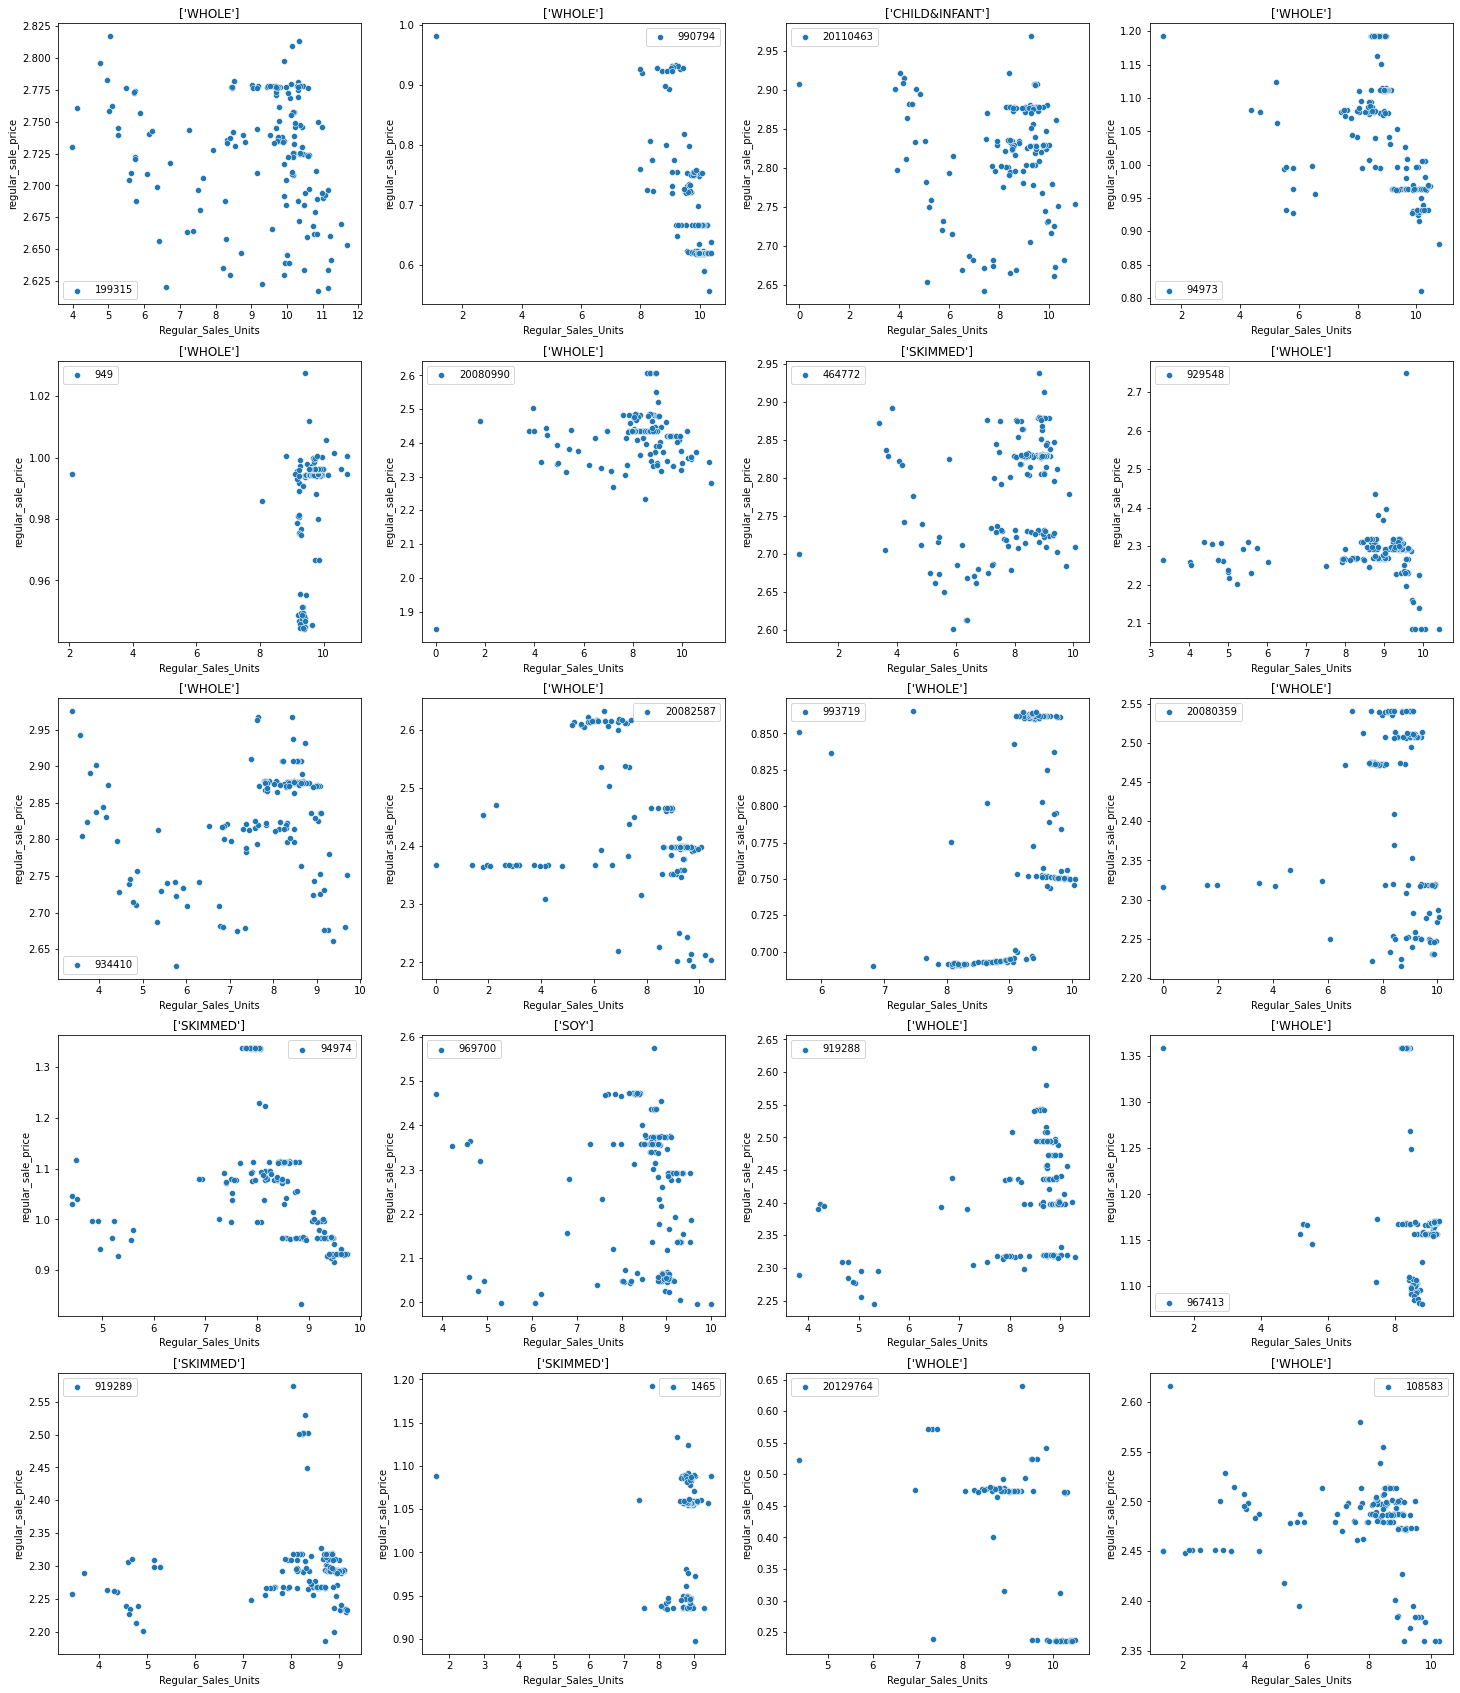

In [9]:
# Showing the trend of price & sales
plt.figure(figsize=(25,30))
count = 1

for i in top_20_index:
    plt.subplot(5,4,count)
    sns.scatterplot(np.log(data['Regular_Sales_Units'][i]),np.log(data['regular_sale_price'][i]),label=i)
    count +=1
    plt.legend()
    plt.title(np.unique(list(data['Subcategory'][i])))
plt.show()

In [20]:
# graping the prices and the sales of each productions 

a = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] =='00000199315 - GLORIA MILK EVAP WHOLE CAN 400GR 6PK']
a = a.rename(columns = {'Regular_Sales_Units':'sales_1', 'regular_sale_price': 'price_1' })
a.index = range(len(a))
#
b = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] =='00000990794 - LA PREFERIDA MILK CHOCO BAG800ML']
b=b.rename(columns = {'Regular_Sales_Units':'sales_2', 'regular_sale_price': 'price_2' })
b.index = range(len(b))
#
c = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] =='00020110463 - GLORIA MILK EVAP CHILD CAN 400GR 6PK']
c=c.rename(columns = {'Regular_Sales_Units':'sales_3', 'regular_sale_price': 'price_3' })
c.index = range(len(c))
#
d = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] =='00000094973 - GLORIA MILK UHT WHOLE BAG946ML']
d=d.rename(columns = {'Regular_Sales_Units':'sales_4', 'regular_sale_price': 'price_4' })
d.index = range(len(d))
#
e = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] == '00000000949 - GLORIA MILK EVAP WHOLE CAN 400GR']
e=e.rename(columns = {'Regular_Sales_Units':'sales_5', 'regular_sale_price': 'price_5' })
e.index = range(len(e))
#
f = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] =='00020080990 - PURA VIDA WHOLE PK 6 CAN  400 GR']
f=f.rename(columns = {'Regular_Sales_Units':'sales_6', 'regular_sale_price': 'price_6' })
f.index = range(len(f))
#
g = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] =='00000464772 - GLORIA MILK EVAP SKIMMED CAN 400GR 6PK']
g=g.rename(columns = {'Regular_Sales_Units':'sales_7', 'regular_sale_price': 'price_7' })
g.index = range(len(g))
#
i = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] =='00000929548 - GLORIA MILK UHT WHOLE CARTON1L 3PK']
i=i.rename(columns = {'Regular_Sales_Units':'sales_8', 'regular_sale_price': 'price_8' })
i.index = range(len(i))
#
k = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] =='00000934410 - GLORIA EVAP LACTOSE FREE CAN 400GR 6PK']
k=k.rename(columns = {'Regular_Sales_Units':'sales_9', 'regular_sale_price': 'price_9' })
k.index = range(len(k))
#
l = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] =='00020082587 - REINA DEL CAMPO WHOLE CAN 400GR 6PK']
l=l.rename(columns = {'Regular_Sales_Units':'sales_10', 'regular_sale_price': 'price_10' })
l.index = range(len(l))
#
m = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] =='00000993719 - LAIVE MILK WHOLE BAG400GR']
m=m.rename(columns = {'Regular_Sales_Units':'sales_11', 'regular_sale_price': 'price_11' })
m.index = range(len(m))
#
n = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] =='00020080359 - BONLE WHOLE CARTON500GR6PK']
n=n.rename(columns = {'Regular_Sales_Units':'sales_12', 'regular_sale_price': 'price_12' })
n.index = range(len(n))
#
o = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] =='00000969700 - SOY VIDA EVAPORATED CAN 400GR 6PK']
o=o.rename(columns = {'Regular_Sales_Units':'sales_16', 'regular_sale_price': 'price_16' })
o.index = range(len(o))
#
p = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] == '00000919288 - GLORIA MILK UHT LACTOSE FREE CARTON1L 3PK']
p=p.rename(columns = {'Regular_Sales_Units':'sales_13', 'regular_sale_price': 'price_13' })
p.index = range(len(p))
#
q = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] =='00000919289 - GLORIA MILK UHT SKIMMED CARTON1L 3PK']
q=q.rename(columns = {'Regular_Sales_Units':'sales_14', 'regular_sale_price': 'price_14' })
q.index = range(len(q))
#
r = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] =='00000001465 - GLORIA MILK EVAP SKIMMED CAN 400GR']
r=r.rename(columns = {'Regular_Sales_Units':'sales_15', 'regular_sale_price': 'price_15' })
r.index = range(len(r))
#
t = data.loc[:,['Regular_Sales_Units','regular_sale_price']]\
          [data.loc[:,'Product'] =='00000108583 - IDEAL AMANECER WHOLE CAN 400GR 6PK']
t=t.rename(columns = {'Regular_Sales_Units':'sales_17', 'regular_sale_price': 'price_17' })
t.index = range(len(t))

# storing subsets 
length = [a,b,c,d,e,f,g,i,k,l,m,n,o,p,q,r,t]

In [21]:
# Combining all subsets 
final_data = pd.concat([a.iloc[:138],b.iloc[:138],c.iloc[:138],d.iloc[:138],\
                        e.iloc[:138],f.iloc[:138],g.iloc[:138],i.iloc[:138],\
                        k.iloc[:138],l.iloc[:138],m.iloc[:138],n.iloc[:138],\
                       o.iloc[:138],p.iloc[:138],q.iloc[:138],r.iloc[:138],t.iloc[:138]],axis =1) 
# log all data 
final_log_data = np.log(final_data)

In [24]:
# OLS Regression model
lm = smf.ols(formula = """sales_1 ~ price_1 +                               
price_2+
price_3+
price_4+
price_5+
price_6+
price_7+
price_8+
price_9+
price_10+
price_11+
price_12+
price_16+
price_13+
price_14+
price_15+
price_17 """,
              data = final_log_data)

resultslm = lm.fit()

# Printing results 
print(resultslm.summary())


                            OLS Regression Results                            
Dep. Variable:                sales_1   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     4.145
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.75e-06
Time:                        14:11:53   Log-Likelihood:                -245.85
No. Observations:                 137   AIC:                             527.7
Df Residuals:                     119   BIC:                             580.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.1612     24.136      1.291      0.1

In [40]:
# Adjusted OLS Regression model
lm = smf.ols(formula = """sales_1 ~ price_1 +                              
price_2+
price_4+
price_5+
price_7+
price_15 """,
              data = final_log_data)

resultslm = lm.fit()
# Printing results 
print(resultslm.summary())


# Storing coefficients for later
coef = pd.DataFrame(resultslm.params)
coef.columns = ["coefficients"]
coef = coef.transpose(copy = True)

# Store standard errors for later
se = pd.DataFrame(resultslm.bse)
se.columns = ["std_err"]
se = se.transpose(copy = True)

                            OLS Regression Results                            
Dep. Variable:                sales_1   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     11.82
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.50e-10
Time:                        14:22:24   Log-Likelihood:                -247.89
No. Observations:                 137   AIC:                             509.8
Df Residuals:                     130   BIC:                             530.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7736     13.911      2.068      0.0

In [ ]:
# Defining (b) = betas
b0 = 28.7736  #Intercept
b1 = -8.8593  #log_price_1
b2 = -2.3049   #log_price_2
b3 = 5.9173   #log_price_4
b4 = -22.6802  #log_price_5
b5 = 3.3338   #log_price_7
b6 = 12.4794   #log_price_15

std1 = 3.210

In [53]:
# Main Monte Carlo Simulation for Top 20 Products 
# Setting random seed and number of simulations
np.random.seed(69) 
number_sims = 100

# List for item results
item_results = []

for i in top_20_index :
    
    # Getting variables for demand min, max, mean and sd
    demand_min     = (data['Total_Sales_Units'][i]).min()
    demand_max     = (data['Total_Sales_Units'][i]).max()
    demand_u       = round(data['Total_Sales_Units'][i].mean(),0)
    demand_SD      = (data['Total_Sales_Units'][i]).std()
    
   
 
    cost   = data["unit_cost"][i].mean()
    price  = data['regular_sale_price'][i].fillna(0)
    price  = np.where(price == -np.inf,0,price)
    price  = np.where(price == np.inf, 0 ,price)
    price  = max(price)
        
    
    #Punishment values
    gonebadcost    = cost
    stock_out_cost = price-cost # can change not sure
    
    # List for different Qs 
    Q_results = []
    
    # Loops For Qs 
    for Q in range (demand_min, demand_max):  
        
        #List for results
        results = []
        
        # Loops for 100 simulations
        for j in range(number_sims):
            
            #Getting demand as normal distributions
            demand = round(np.random.normal(demand_u, demand_SD),0)
            demand = np.where(demand <=0 ,demand_u, demand)

            # Different Profit caluculations for different situations
            if (demand <= Q):
                profits = demand*(price-cost) - gonebadcost*(Q-demand)
            else:
                profits = Q*(price-cost) - stock_out_cost*(demand-Q)
            
            # putting the results of simmulation to the list
            results.append([demand, Q, min(demand,Q), profits])
        # Making results into DF
        results_df = pd.DataFrame(results, columns=['Demand','Q','Sales','Profits'])
        
        # Adding the results to the Q results list 
        Q_results.append([Q, results_df['Profits'].mean(),results_df['Sales'].sum()/results_df['Demand'].sum() ]) 

    # Making Q results into DF
    Q_results_df = pd.DataFrame.from_records(Q_results, columns=['Q','Profits', 'Service'])
    
    ##Seeing the Results with Scatter plot
    #Q_results_df.plot.scatter(x="Q", y="Profits");

    # getting the best profit result for the DF
    Q_best = Q_results_df.loc[Q_results_df['Profits'] == Q_results_df['Profits'].max()]
    
     # Checkigng if we have any results 
    if Q_best.empty is False:
        
        # Creating newcolumns and Appending to the final list
        subcategory   = data["Subcategory"][i].head(1).iloc[0]
        item_name     = (((data["Product"][i].head(1)).iloc[0]).split('- '))[1]
        Prom_to_total = data["promotion_rate"][i].mean()
        item_results.append([subcategory, i, item_name, Q_best.iloc[0]['Q'], Q_best.iloc[0]['Profits'], Q_best.iloc[0]['Service'], Prom_to_total])

# Appending to the final DF
item_results_df  = pd.DataFrame.from_records(item_results, columns=['Subcategory','Item','Item Name','Q','Profits', 'Service', 'Promotion rate'])
item_results_df  

,Subcategory,Item,Item Name,Q,Profits,Service,Promotion rate
0,WHOLE,199315,GLORIA MILK EVAP WHOLE CAN 400GR 6PK,44490.0,9821.869724,0.643221,0.560204
1,WHOLE,990794,LA PREFERIDA MILK CHOCO BAG800ML,25025.0,18637.681131,0.927342,0.144180
2,CHILD&INFANT,20110463,GLORIA MILK EVAP CHILD CAN 400GR 6PK,24182.0,24291.998344,0.819634,0.530944
3,WHOLE,94973,GLORIA MILK UHT WHOLE BAG946ML,18388.0,4300.861561,0.770635,0.255391
4,WHOLE,949,GLORIA MILK EVAP WHOLE CAN 400GR,13048.0,1565.660441,0.726324,0.032282
5,WHOLE,20080990,PURA VIDA WHOLE PK 6 CAN 400 GR,16177.0,10613.847597,0.747743,0.334765
6,SKIMMED,464772,GLORIA MILK EVAP SKIMMED CAN 400GR 6PK,14260.0,11776.285196,0.751791,0.472308
7,WHOLE,929548,GLORIA MILK UHT WHOLE CARTON1L 3PK,16368.0,71879.258315,0.948481,0.312894
8,WHOLE,934410,GLORIA EVAP LACTOSE FREE CAN 400GR 6PK,11058.0,9907.407574,0.732974,0.485449
9,WHOLE,20082587,REINA DEL CAMPO WHOLE CAN 400GR 6PK,10761.0,9317.147058,0.762514,0.216268
